# HackDavis 2021 Project

   at this current phase, we will be fetching the data from both yahoo fincance and google

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

#  after importing the libraries, I will be fethcing data 

both google and yahoo finance will be used and we'll have data sets then we will see which one is the best for us to continue with

The company will be Apple and the dates will be between 2009 and current date

In [5]:
start_date_yf, end_date_yf = '2009-01-01', '2021-01-16'

In [6]:
apple_yf = yf.download('aapl', start=start_date_yf, end= end_date_yf) #using yfinance, we can add more intervals

[*********************100%***********************]  1 of 1 completed


In [7]:
apple_yf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.795913,746015200
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.913912,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.865849,1289310400
2009-01-07,3.278929,3.303571,3.223572,3.250357,2.803923,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.855991,673500800
...,...,...,...,...,...,...
2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900
2021-01-12,128.500000,129.690002,126.860001,128.800003,128.800003,91951100
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800


 # Indicators Modeling
 
 Below, I will start writing fuctions that will implement the indicators so we can train the model to use them for predictions for future price
 
I will start with Bollinger Bands, then ADX, RSI and finally MACD

# Bollinger Bands

Definition:

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s

In [25]:
def BB(stock, m_previous=20, n_std=2):
    #I will make a copy of the data of the stock because I will have to drop some values and mutate someother
    #However, if there is a better way, we can for sure do it..
    BB_stock = stock.copy()
    BB_stock["MA"] = BB_stock["Adj Close"].rolling(m_previous).mean()
    BB_stock["upperBond"] = BB_stock["MA"] + n_std * BB_stock["MA"].rolling(m_previous).std()
    BB_stock["lowerBand"] = BB_stock["MA"] - n_std * BB_stock["MA"].rolling(m_previous).std()
    BB_stock["width"] = BB_stock["upperBond"] - BB_stock["lowerBand"]
    BB_stock.dropna(inplace=True)
    return BB_stock

The function above takes 3 parameters:

Stock = stock data that we downloaded earlier

m_previous = how many previous closing prices that we need.. if our data was gathered as daily data, then it is daily. If the data was collected as hourly, then it would be hourly -> automatic just entered the number of previous candlesticks you want, default is 20

n_std = number of standard deviation -> this is important because the default is 2 as per technical analysis, but we can for sure use more to ensure more accurate trades. The more n_std is the more accurate and confident our predictions are and the less requent our trades would be.

In [27]:
apple_BB2=BB(apple_yf) #for 2 std

<AxesSubplot:title={'center':'Apple Bollinger Bands with 2 std'}, xlabel='Date'>

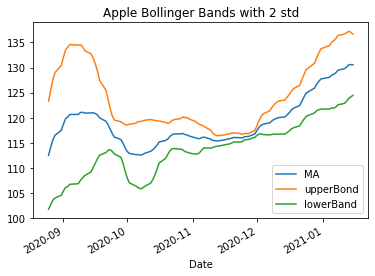

In [28]:
apple_BB2.iloc[-100:,[-4,-3,-2]].plot(title="Apple Bollinger Bands with 2 std")

In [29]:
apple_BB4=BB(apple_yf,20,4) #for 4 std

<AxesSubplot:title={'center':'Apple Bollinger Bands with 4 std'}, xlabel='Date'>

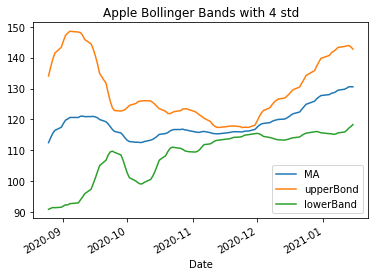

In [30]:
apple_BB4.iloc[-100:,[-4,-3,-2]].plot(title="Apple Bollinger Bands with 4 std")